In [511]:
import numpy as np 
import pandas as pd 
from datetime import datetime

import seaborn as sns 
import matplotlib.pyplot as plt 

In [512]:
ts_df = pd.read_csv(rf'C:\Users\james\OneDrive\Documents\GitHub\jamsydLibrary\approved_projects\interactive_brokers\Data\ICEUS_DLY_CT1!, 1D.csv',index_col='time',parse_dates=True)

In [513]:
ts_df.head()

,open,high,low,close,Commercials net
time,,,,,
1972-08-22,26.50,26.90,26.44,26.73,NaN
1972-08-23,26.78,27.08,26.74,27.03,NaN
1972-08-24,27.20,27.26,26.88,27.06,NaN
1972-08-25,27.05,27.33,26.95,27.22,NaN
1972-08-28,27.25,27.25,27.04,27.04,NaN


In [514]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.seasonal import seasonal_decompose

In [515]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [516]:
check_stationarity(ts_df['close'].diff(1).dropna(axis=0))

ADF Statistic: -17.154830
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary


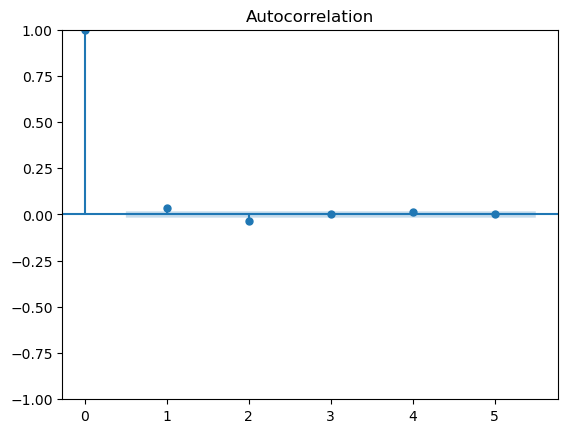

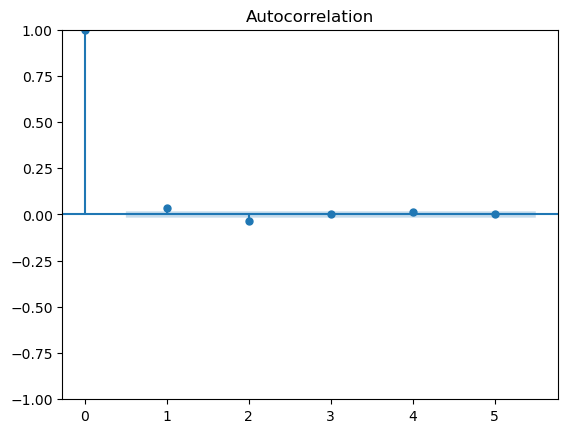

In [517]:
plot_acf(np.exp(np.log(ts_df['close']).diff(1).dropna(axis=0)), alpha=0.05, lags=5)

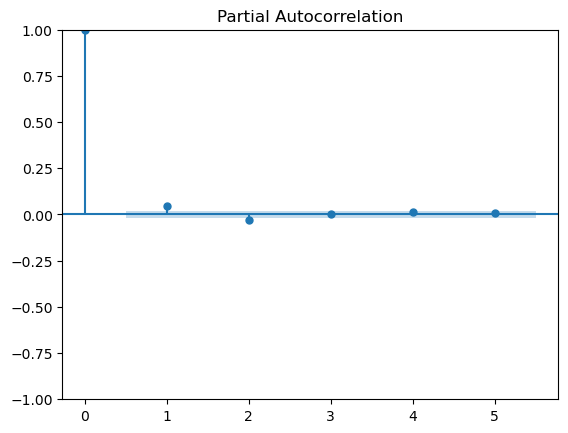

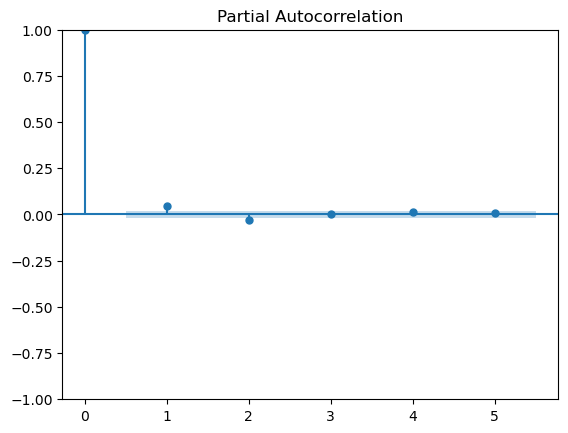

In [519]:
plot_pacf(np.sqrt(ts_df['close']).diff(1).dropna(axis=0), alpha=0.05, lags=5)


In [522]:
mod = sm.tsa.arima.ARIMA(np.exp(np.log(ts_df['close']).diff(1).dropna(axis=0)), order=(2, 0, 0))
res = mod.fit()

In [523]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                12985
Model:                 ARIMA(2, 0, 0)   Log Likelihood               34654.738
Date:                Sat, 18 May 2024   AIC                         -69301.475
Time:                        19:01:00   BIC                         -69271.589
Sample:                             0   HQIC                        -69291.489
                              - 12985                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0002      0.000   6472.460      0.000       1.000       1.001
ar.L1          0.0352      0.007      4.814      0.000       0.021       0.050
ar.L2         -0.0356      0.008     -4.496      0.000      -0.051      -0.020
sigma2         0.0003   5.94e-07    473.588      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           3079237.49
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                            -2.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        78.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [524]:
acf_values = sm.tsa.acf(np.exp(np.log(ts_df['close']).diff(1).dropna(axis=0)), nlags=20)
pacf_values = sm.tsa.pacf(np.exp(np.log(ts_df['close']).diff(1).dropna(axis=0)), nlags=20)

In [525]:
acf_values

array([ 1.00000000e+00,  3.40191632e-02, -3.44102372e-02,  9.89080988e-04,
        1.37986509e-02,  1.91078625e-03,  2.38064583e-03,  8.70139829e-03,
        3.05289789e-03,  1.79769170e-02,  7.59855355e-03, -1.44049845e-02,
        1.85730178e-02,  1.34597322e-02,  6.72012394e-03, -6.67672245e-03,
        1.15810116e-02,  8.70845272e-03, -3.54355908e-03,  2.34857128e-02,
       -9.33075210e-04])

In [526]:
pacf_values

array([ 1.        ,  0.03402178, -0.03561424,  0.00342184,  0.01245201,
        0.00114095,  0.00319505,  0.00858462,  0.00246659,  0.01839536,
        0.00642983, -0.01393391,  0.01997291,  0.01061191,  0.00695414,
       -0.0061938 ,  0.01170187,  0.00694817, -0.00368997,  0.02392915,
       -0.00306226])

# Writing test code

In [527]:
import numpy as np 
import pandas as pd 
from scipy.stats import skew, kurtosis

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.seasonal import seasonal_decompose

In [528]:
def apply_transformation(timeseries,transformation):

    """
        Description: 

        :param timeseries: The timeseries
        :param transformation: The transformation to apply to the data
    """

    transformed_timeseries = None

    if transformation == 'log_diff':
        transformed_timeseries = 100*(np.exp(np.log(timeseries).diff(1)) - 1)

    # if transformed_timeseries == None:
    #     return "Transformation not registered"
    # else:
    return transformed_timeseries
       


In [529]:
# import numpy as np
# import pandas as pd
# from scipy.stats import boxcox

# def apply_transformation(timeseries, transformation, **kwargs):
#     """
#     Description: Applies the specified transformation to the timeseries.
    
#     :param timeseries: The timeseries data as a Pandas Series.
#     :param transformation: The transformation to apply to the data as a string.
#     :param kwargs: Additional arguments for specific transformations (e.g., 'lambda' for Box-Cox).
#     :return: The transformed timeseries as a Pandas Series.
#     """

#     transformed_timeseries = None

#     if transformation == 'log':
#         transformed_timeseries = np.log(timeseries)
#     elif transformation == 'difference':
#         transformed_timeseries = timeseries.diff().dropna()
#     elif transformation == 'seasonal_difference':
#         period = kwargs.get('period', 12)  # Default period is 12 (monthly data with yearly seasonality)
#         transformed_timeseries = timeseries.diff(periods=period).dropna()
#     elif transformation == 'power':
#         power = kwargs.get('power', 0.5)  # Default power is 0.5 (square root)
#         transformed_timeseries = timeseries**power
#     elif transformation == 'boxcox':
#         lam = kwargs.get('lambda', None)  # Lambda parameter for Box-Cox
#         transformed_timeseries, _ = boxcox(timeseries.dropna(), lmbda=lam)
#         transformed_timeseries = pd.Series(transformed_timeseries, index=timeseries.dropna().index)
#     elif transformation == 'z_score':
#         transformed_timeseries = (timeseries - timeseries.mean()) / timeseries.std()
#     elif transformation == 'min_max':
#         transformed_timeseries = (timeseries - timeseries.min()) / (timeseries.max() - timeseries.min())
#     elif transformation == 'moving_average':
#         window = kwargs.get('window', 3)  # Default window size is 3
#         transformed_timeseries = timeseries.rolling(window=window).mean().dropna()
#     elif transformation == 'exponential_smoothing':
#         alpha = kwargs.get('alpha', 0.3)  # Default smoothing factor alpha is 0.3
#         transformed_timeseries = timeseries.ewm(alpha=alpha).mean()
#     elif transformation == 'rolling_mean_diff':
#         window = kwargs.get('window', 3)  # Default window size is 3
#         rolling_mean = timeseries.rolling(window=window).mean().dropna()
#         transformed_timeseries = timeseries[window-1:] - rolling_mean
#     elif transformation == 'log_diff':
#         transformed_timeseries = 100 * (np.exp(np.log(timeseries).diff(1)) - 1)
#     else:
#         return "Transformation not registered"

#     return transformed_timeseries


In [530]:
# Read in the data
ts_df = pd.read_csv(r'C:\Users\james\OneDrive\Documents\GitHub\jamsydLibrary\approved_projects\interactive_brokers\Data\BATS_GDX, 1D.csv',index_col='time',parse_dates=True)

In [531]:
ts_df['transformation'] = apply_transformation(timeseries = ts_df['close'], transformation = "log_diff")

In [532]:
ts_df['ma'] = ts_df['close'].rolling(window=18).mean()

In [533]:
ts_df = ts_df.dropna(axis=0)

In [534]:
ts_df['ma_diff'] = ts_df['ma'].diff(1)

In [535]:
import warnings
import pandas as pd
import statsmodels.api as sm

# Suppress specific warnings
from statsmodels.tools.sm_exceptions import ValueWarning

# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

# Assuming ts_df is already defined and has a DateTime index
ts_df.index = pd.to_datetime(ts_df.index)

# Infer the frequency of the DateTime index
inferred_freq = pd.infer_freq(ts_df.index)
if inferred_freq:
    ts_df = ts_df.asfreq(inferred_freq)

i                 = 0
forecast_horizon  = 2
min_obs           = 10  # Minimum number of observations needed to fit the model
all_forecasts     = []
historical_series = 300
forecast_order    = (3, 0, 0)
product           = 'GDX'


while i < len(ts_df):

    if i < min_obs:
        i += forecast_horizon
        continue

    # Ensure there are enough observations for historical_series
    if i + historical_series >= len(ts_df):
        break

    end = min(i + forecast_horizon, len(ts_df))
    # Corrected the slicing of the DataFrame
    mod = sm.tsa.arima.ARIMA(ts_df['transformation'].iloc[i:i + historical_series], order=forecast_order)
    res = mod.fit()

    # Forecast the next 5 days
    forecast = res.forecast(steps=forecast_horizon)

    # Taking previous day
    last_close = ts_df['close'].iloc[i + historical_series - 1]

    forecasts         = ((1 + forecast / 100) * last_close).tolist()
    forecast_dates    = ts_df.index[i + historical_series:i + historical_series + forecast_horizon].tolist()
    close_actual      = ts_df['close'].iloc[i + historical_series:i + historical_series + forecast_horizon].tolist()
    forecast_position = [1,2,3,4,5]
    model_id          = [product + '_' + str(i) + "_" + str(forecast_order), 
                         product + '_' + str(i) + "_" + str(forecast_order), 
                         product + '_' + str(i) + "_" + str(forecast_order)]
    last_price        = forecast_horizon*[last_close]
    std_dev           = forecast_horizon*[np.std(ts_df['close'].iloc[i:i + historical_series].diff(1))]
    mean              = forecast_horizon*[np.mean(ts_df['close'].iloc[i:i + historical_series].diff(1))]
    ma_diff           = forecast_horizon*[ts_df['ma_diff'].iloc[i + historical_series - 1]]

    # Append the forecasts and corresponding dates to all_forecasts
    all_forecasts.extend(list(zip(forecast_dates, forecasts, close_actual,forecast_position, model_id, last_price, std_dev, mean, ma_diff)))
    i += forecast_horizon  # Move to the next set of 5 days

    # if i > 1000:
    #     break

forecast_df = pd.DataFrame(all_forecasts, columns=['Date', 'Forecast', 'Close', 'Forecast_Position', 'model_id','last_price', 'standard_dev', 'mean','ma_diff'])

KeyboardInterrupt: 

In [ ]:
import warnings
import pandas as pd
import statsmodels.api as sm

# Suppress specific warnings
from statsmodels.tools.sm_exceptions import ValueWarning

# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

# Assuming ts_df is already defined and has a DateTime index
ts_df.index = pd.to_datetime(ts_df.index)

# Infer the frequency of the DateTime index
inferred_freq = pd.infer_freq(ts_df.index)
if inferred_freq:
    ts_df = ts_df.asfreq(inferred_freq)

i                 = 0
forecast_horizon  = 2
min_obs           = 10  # Minimum number of observations needed to fit the model
all_forecasts     = []
historical_series = 300
forecast_order    = (3, 0, 0)
product           = 'GDX'


while i < len(ts_df):

    if i < min_obs:
        i += forecast_horizon
        continue

    # Ensure there are enough observations for historical_series
    if i + historical_series >= len(ts_df):
        break

    end = min(i + forecast_horizon, len(ts_df))
    # Corrected the slicing of the DataFrame
    mod = sm.tsa.arima.ARIMA(ts_df['transformation'].iloc[i:i + historical_series], order=forecast_order)
    res = mod.fit()

    # Forecast the next 5 days
    forecast = res.forecast(steps=forecast_horizon)

    # Taking previous day
    last_close = ts_df['close'].iloc[i + historical_series - 1]

    forecasts         = ((1 + forecast / 100) * last_close).tolist()
    forecast_dates    = ts_df.index[i + historical_series:i + historical_series + forecast_horizon].tolist()
    close_actual      = ts_df['close'].iloc[i + historical_series:i + historical_series + forecast_horizon].tolist()
    forecast_position = [1,2,3,4,5]
    model_id          = [product + '_' + str(i) + "_" + str(forecast_order), 
                         product + '_' + str(i) + "_" + str(forecast_order), 
                         product + '_' + str(i) + "_" + str(forecast_order)]
    last_price        = forecast_horizon*[last_close]
    std_dev           = forecast_horizon*[np.std(ts_df['close'].iloc[i:i + historical_series].diff(1))]
    mean              = forecast_horizon*[np.mean(ts_df['close'].iloc[i:i + historical_series].diff(1))]
    ma_diff           = forecast_horizon*[ts_df['ma_diff'].iloc[i + historical_series - 1]]

    # Append the forecasts and corresponding dates to all_forecasts
    all_forecasts.extend(list(zip(forecast_dates, forecasts, close_actual,forecast_position, model_id, last_price, std_dev, mean, ma_diff)))
    i += forecast_horizon  # Move to the next set of 5 days

    # if i > 1000:
    #     break

forecast_df = pd.DataFrame(all_forecasts, columns=['Date', 'Forecast', 'Close', 'Forecast_Position', 'model_id','last_price', 'standard_dev', 'mean','ma_diff'])

In [499]:
forecast_df['error'] = forecast_df['Close'] - forecast_df['Forecast']

In [500]:
for i in range(1,forecast_horizon+1):
    print(f"Mean {i}",forecast_df[forecast_df['Forecast_Position'] == i]['error'].mean())
    print(f"Std {i}",forecast_df[forecast_df['Forecast_Position'] == i]['error'].std()/np.std(forecast_df['Close'].dropna(axis=0).diff(i)))
    print(f"Skew {i}",skew(forecast_df[forecast_df['Forecast_Position'] == i]['error']))
    print(f"Kurtosis {i}",kurtosis(forecast_df[forecast_df['Forecast_Position'] == i]['error']))
    

Mean 1 -0.026713505860679623
Std 1 1.0114097696632807
Skew 1 -0.2608089008966422
Kurtosis 1 4.095691202492136
Mean 2 -0.014469979023404174
Std 2 1.0160789898301241
Skew 2 -0.22906239048781446
Kurtosis 2 3.443469040906175


In [501]:
forecast_df['PnL'] = forecast_df['Close'].diff(1)

In [502]:
import math
from itertools import accumulate

pnl = []

for model_id in forecast_df['model_id'].unique():

    forecast_move     = forecast_df[forecast_df['model_id'] == model_id]['Forecast'].iloc[-1] - forecast_df[forecast_df['model_id'] == model_id]['last_price'].iloc[0]
    forecast_move_std = forecast_df[forecast_df['model_id'] == model_id]['standard_dev'].iloc[0]
    
    print(forecast_move)

    if forecast_move < 0:
        if forecast_df[forecast_df['model_id'] == model_id]['ma_diff'].iloc[-1] < 0:
            pnl.extend(-1*forecast_df[forecast_df['model_id'] == model_id]['PnL'].to_list())

    if forecast_move > 0:
        if forecast_df[forecast_df['model_id'] == model_id]['ma_diff'].iloc[-1] > 0:
            pnl.extend(forecast_df[forecast_df['model_id'] == model_id]['PnL'].to_list())

# Replace NaN values with zero
pnl    = [0 if math.isnan(x) else x for x in pnl]
vector = list(accumulate(pnl))

-0.0012775819341186434
0.02635765492585307
0.014524732487700476
0.14217144258221737
0.1609876155513703
0.007695028713690988
0.010796470706054606
0.1108934004896227
-0.05475501660579596
0.08399562991868237
0.011306695415122192
0.06471735674153933
0.08456788162210671
-0.003033835441407007
0.07041174738721168
-0.021572915346943944
0.06015732535367846
0.13958706317791325
0.03540471339728413
0.05263122759693317
0.15445617494764718
0.015702858966434974
-0.209946353386691
0.12472998073275932
-0.10338137312790963
0.12536596623741048
0.21565407134867343
0.05959199073533483
-0.015547882040763739
0.09007017005390594
0.026903029135816325
0.009212568889203965
-0.07166616840364526
-0.124867964983153
-0.1302391838809953
-0.027241658499775667
0.2792638142525732
0.2113926968642872
0.21269100576408562
0.5834768161516095
-0.05591872405737064
0.26980638222548947
0.16336008949512149
0.16493862112466928
-0.14986450326504297
0.11179517065377098
-0.12480515310117823
0.001932808478116499
-0.024934885187761324


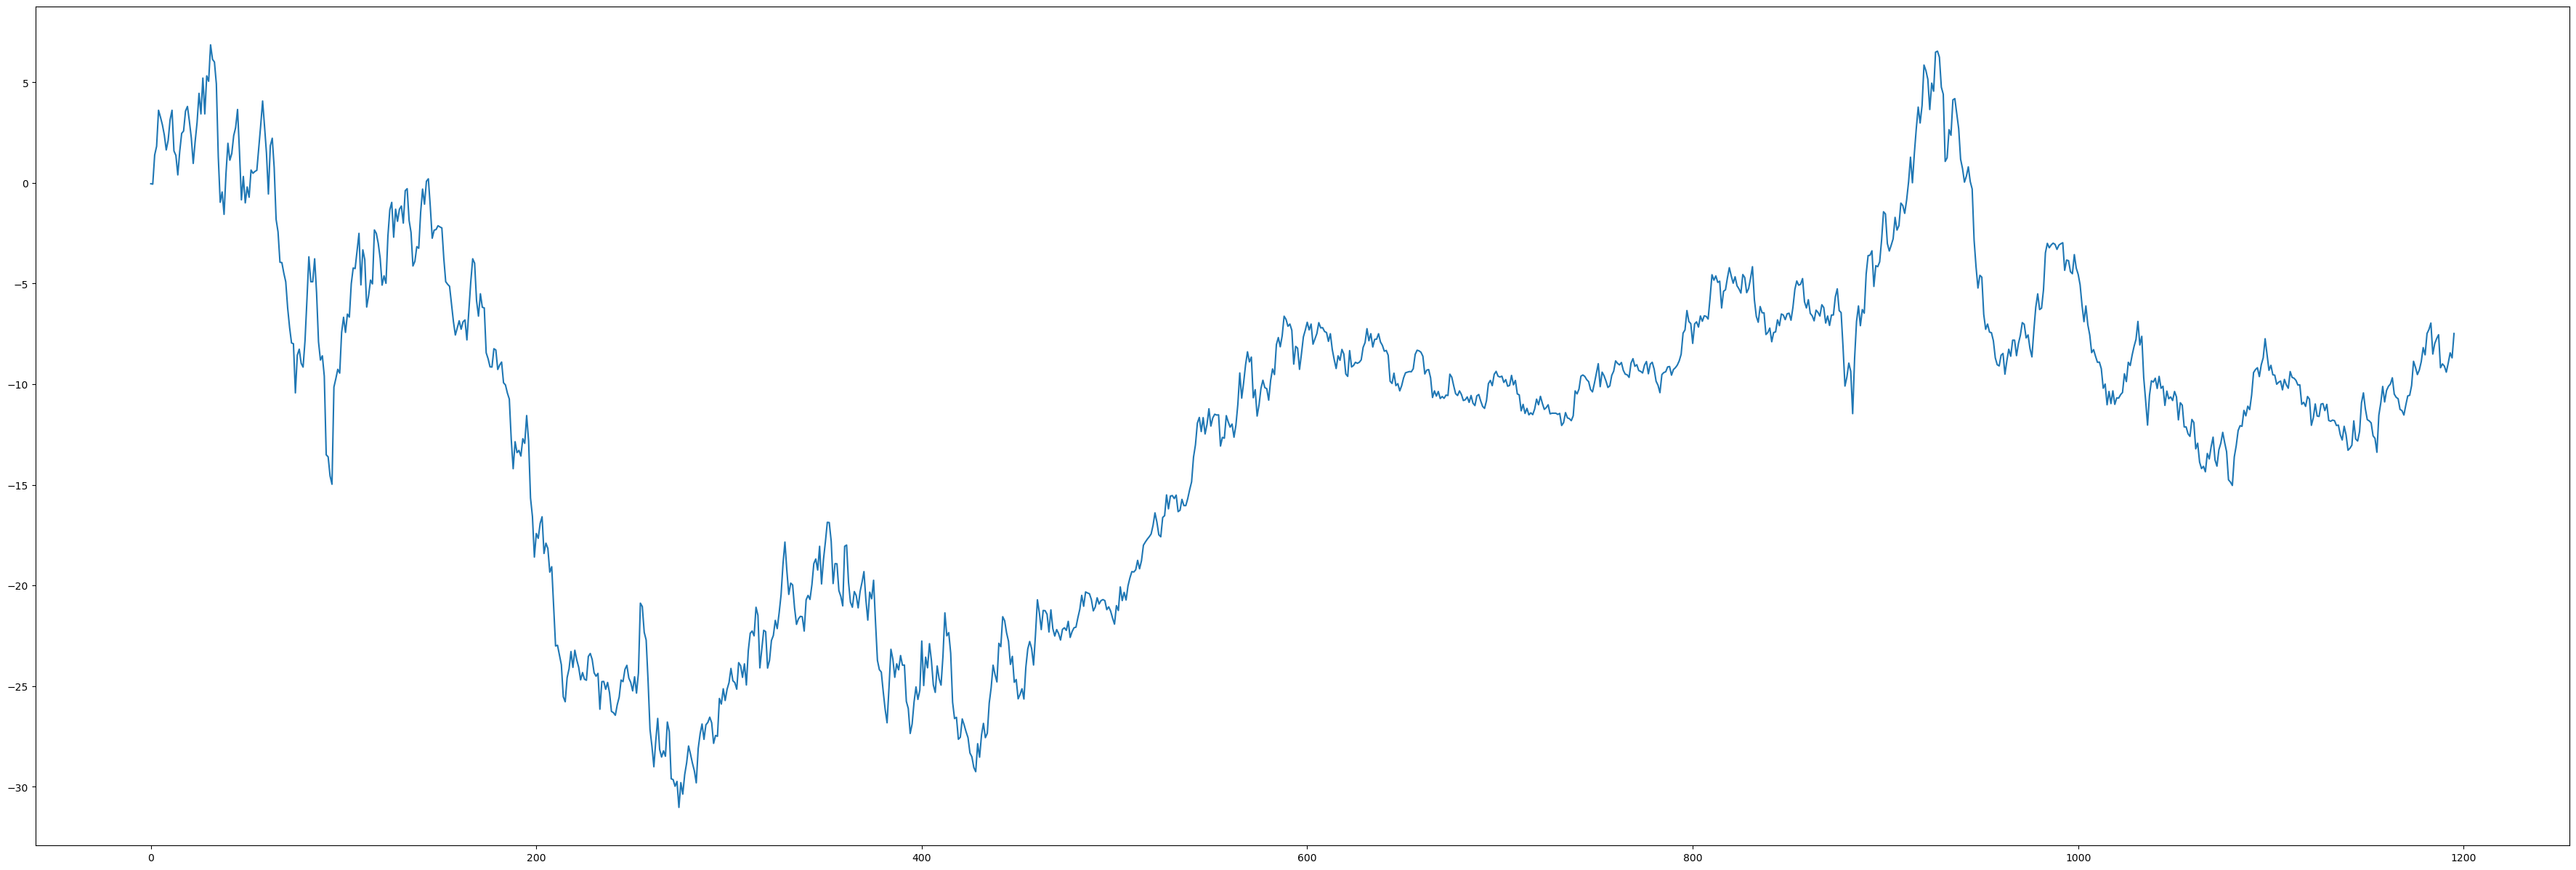

In [503]:
plt.figure(figsize=(45,15))
plt.plot(vector)
plt.show()

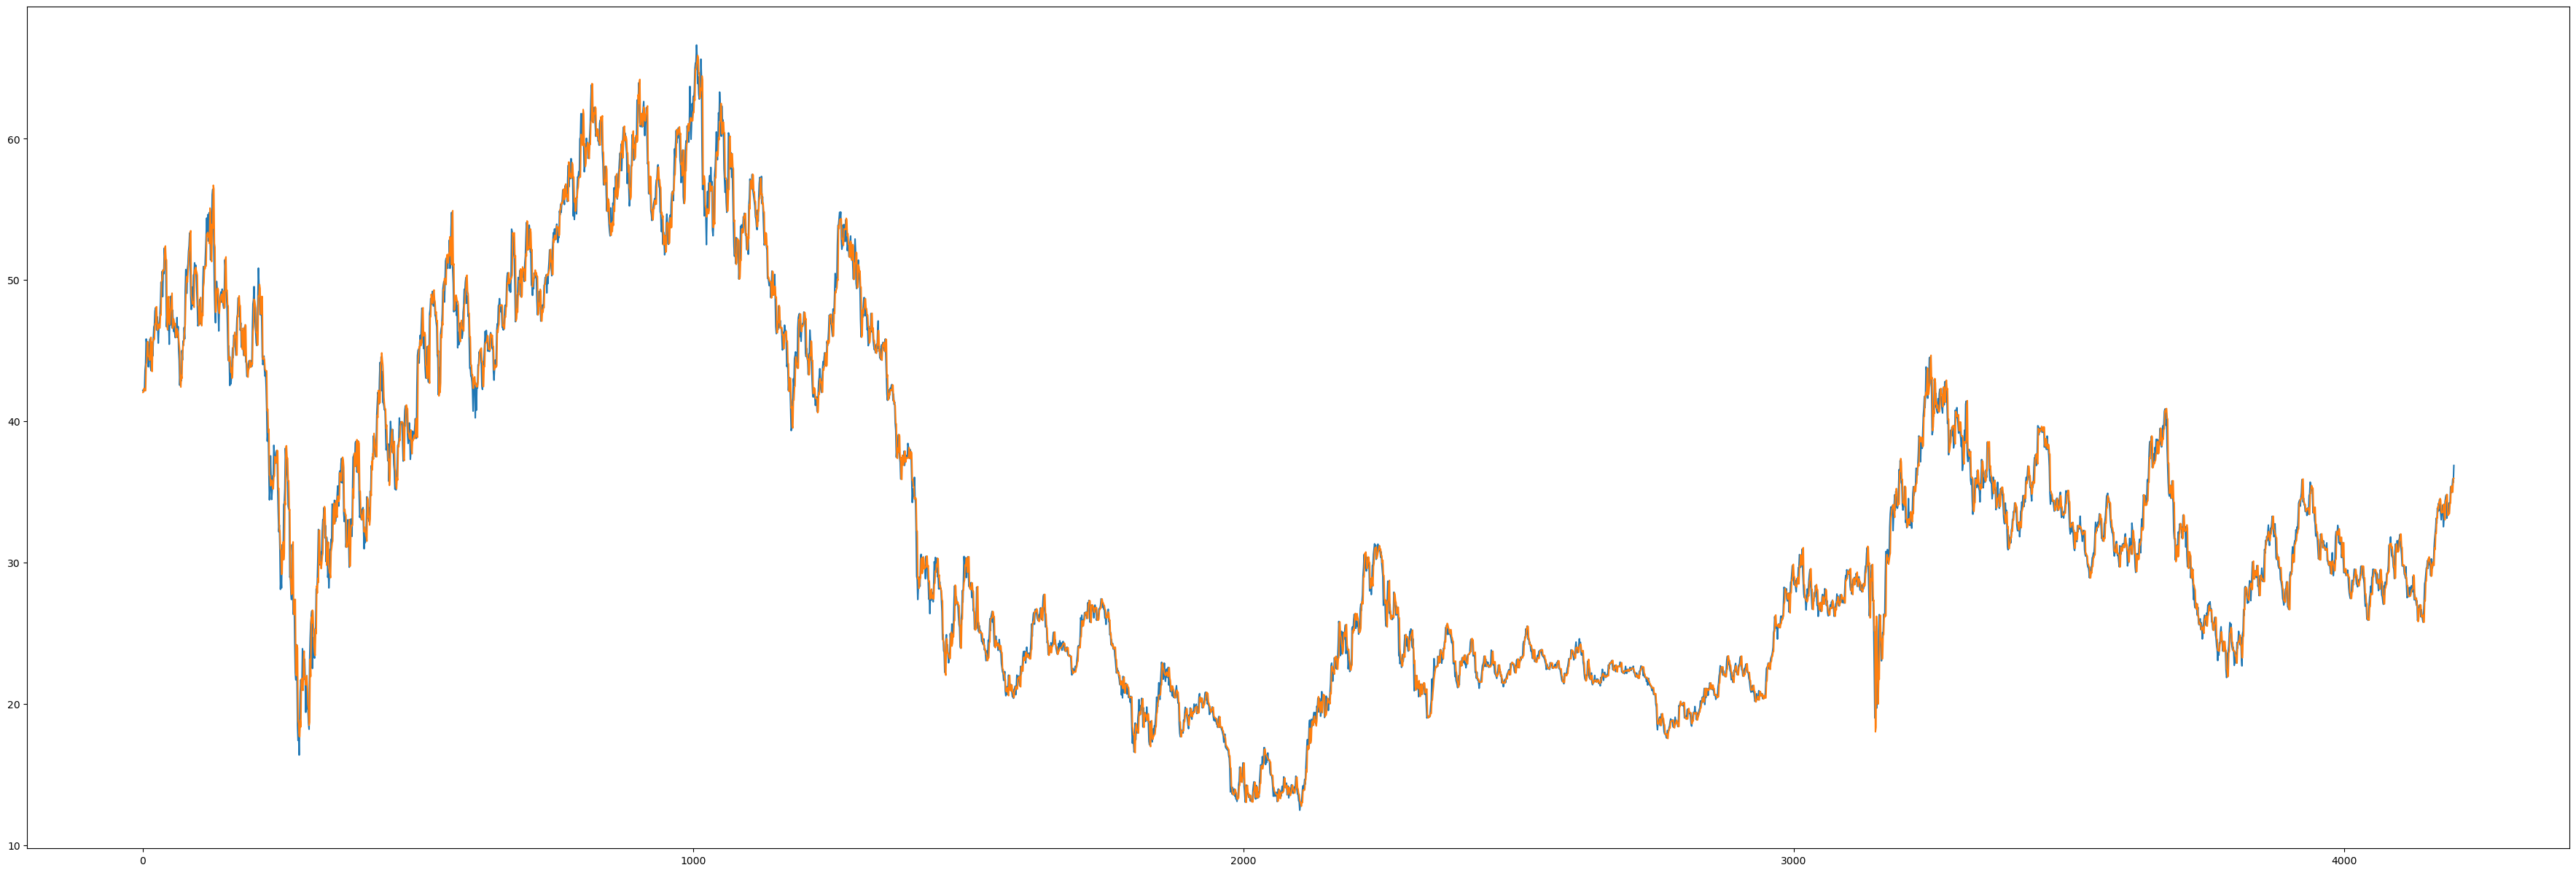

In [504]:
plt.figure(figsize=(45,15))
plt.plot(forecast_df['Close'])
plt.plot(forecast_df['Forecast'])
plt.show()

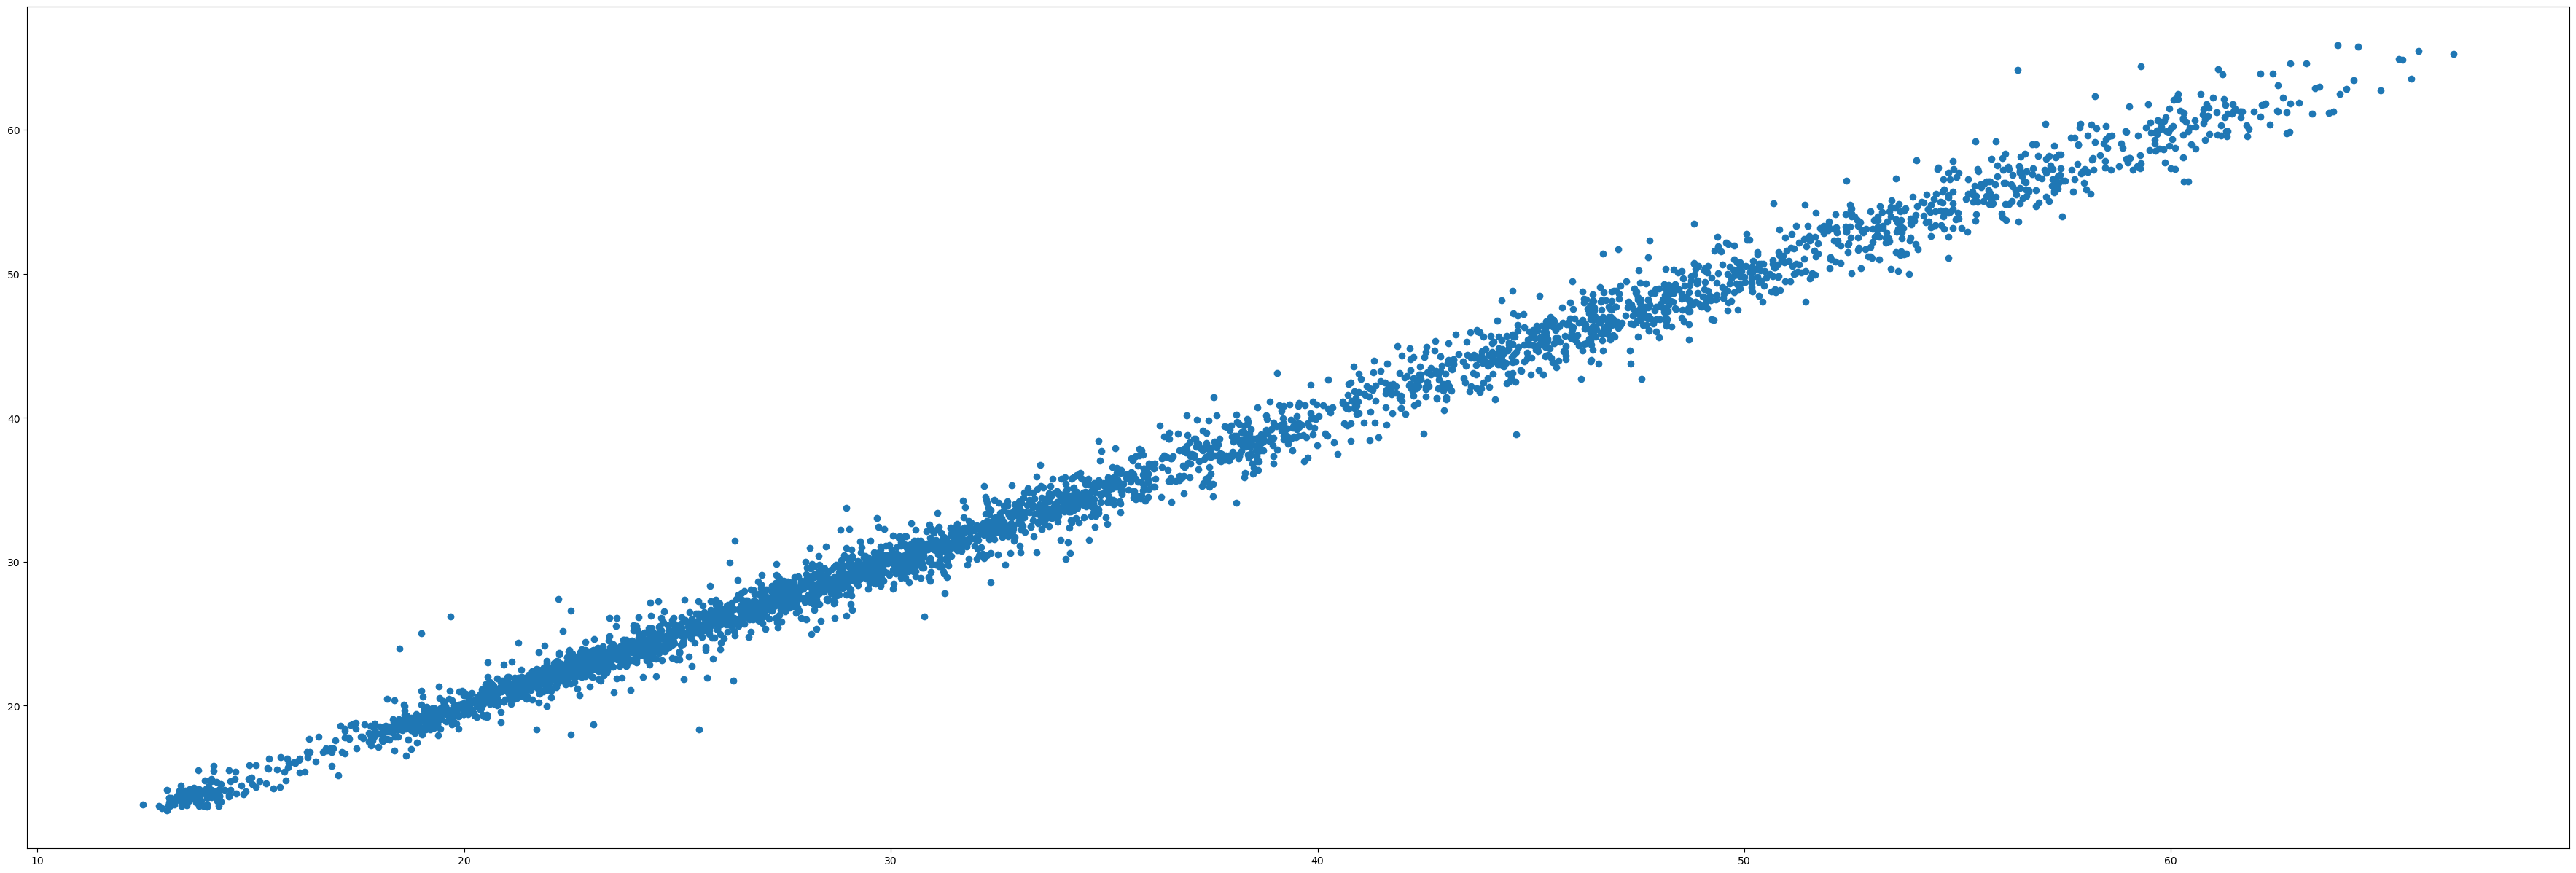

In [505]:
plt.figure(figsize=(45,15))
plt.scatter(forecast_df['Close'],forecast_df['Forecast'])
plt.plot()
plt.show()

In [506]:
np.std(pnl)

0.8678870489669566

(array([  3.,  15.,  64., 227., 564., 257.,  58.,   6.,   1.,   1.]),
 array([-3.91 , -3.036, -2.162, -1.288, -0.414,  0.46 ,  1.334,  2.208,
         3.082,  3.956,  4.83 ]),
 <BarContainer object of 10 artists>)

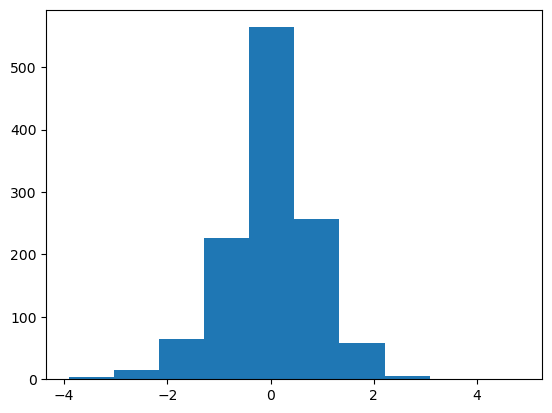

In [507]:
plt.hist(pnl)

In [508]:
# First differencing
# seasonal differencing
# Box cox 
# z score 
# min max normalization
# moving average smoothing
# exponential smoothing
# rolling mean difference

In [ ]:
import numpy as np 
import pandas as pd 

import warnings
warnings.filterwarnings("ignore")

import math
from itertools import accumulate
from scipy.stats import skew, kurtosis

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

def apply_transformation(timeseries,transformation):

    """
        Description: 

        :param timeseries: The timeseries
        :param transformation: The transformation to apply to the data
    """

    transformed_timeseries = None

    if transformation == 'log_diff':
        transformed_timeseries = 100*(np.exp(np.log(timeseries).diff(1)) - 1)

    if transformation == 'first_diff':
        transformed_timeseries = timeseries.diff(1)

    return transformed_timeseries

def first_diff(forecast_horizon, historical_series, forecast_order, product):

    """
    
        Description: 

        :param forecast_horizon:
        :param historical_series:
        :param forecast_order:
        :param product: 
    
    """

    all_forecasts = []

    model_metadata = {

        "model_id":[],
        "aic":[],
        "order":[],
        "mae":[],
        "mse":[],
        "skew":[],
        "kurtosis":[]

    }

    # Read in the data
    ts_df = pd.read_csv(rf'C:\Users\james\OneDrive\Documents\GitHub\jamsydLibrary\approved_projects\interactive_brokers\Data\BATS_{product}, 1D.csv',index_col='time',parse_dates=True)

    # Perform initial transformations
    ts_df['transformation'] = apply_transformation(timeseries = ts_df['close'], transformation = "first_diff")
    ts_df['ma']             = ts_df['close'].rolling(window=18).mean()
    ts_df['ma_diff']        = ts_df['ma'].diff(1)
    ts_df['pnl']            = ts_df['close'].diff(1)
    ts_df                   = ts_df.dropna(axis=0)

    # Assuming ts_df is already defined and has a DateTime index
    ts_df.index = pd.to_datetime(ts_df.index)

    # Infer the frequency of the DateTime index
    inferred_freq = pd.infer_freq(ts_df.index)
    if inferred_freq:
        ts_df = ts_df.asfreq(inferred_freq)

    i = 0
    while i < len(ts_df):

        # Ensure there are enough observations for historical_series
        if i + historical_series >= len(ts_df):
            break

        end = min(i + forecast_horizon, len(ts_df))

        # Corrected the slicing of the DataFrame
        mod = sm.tsa.arima.ARIMA(ts_df['transformation'].iloc[i:i + historical_series], order=forecast_order)
        res = mod.fit()

        # Forecast the next 5 days
        forecast = res.forecast(steps=forecast_horizon)

        # Taking previous day
        last_close        = ts_df['close'].iloc[i + historical_series - 1]
        forecasts         = forecast .tolist()
        forecast_dates    = ts_df.index[i + historical_series:i + historical_series + forecast_horizon].tolist()
        close_actual      = ts_df['close'].iloc[i + historical_series:i + historical_series + forecast_horizon].tolist()
        model_id          = product + '_' + str(i) + "_" + str(forecast_order)

        # store model metadata
        model_metadata['model_id'].append(model_id)
        model_metadata['aic'].append(res.aic)
        model_metadata['order'].append(str(forecast_order))
        model_metadata['mae'].append(np.mean(np.abs(res.resid)))
        model_metadata['mse'].append(np.mean(np.square(res.resid)))
        model_metadata['skew'].append(skew(res.resid))
        model_metadata['kurtosis'].append(kurtosis(res.resid))

        # Information to store in list
        forecast_position = [i for i in range(1,forecast_horizon + 1)]
        model_id_lst      = forecast_horizon*[model_id]
        last_price        = forecast_horizon*[last_close]
        std_dev           = forecast_horizon*[np.std(ts_df['close'].iloc[i:i + historical_series].diff(1))]
        mean              = forecast_horizon*[np.mean(ts_df['close'].iloc[i:i + historical_series].diff(1))]
        ma_diff           = forecast_horizon*[ts_df['ma_diff'].iloc[i + historical_series - 1]]

        # Append the forecasts and corresponding dates to all_forecasts
        all_forecasts.extend(list(zip(forecast_dates, forecasts, close_actual, forecast_position, model_id_lst, last_price, std_dev, mean, ma_diff)))
        i += forecast_horizon 

        if i > 100:
            break


    # Saving the forecast dataframe
    forecast_df          = pd.DataFrame(all_forecasts, columns=['Date', 'Forecast', 'Close', 'Forecast_Position', 'model_id','last_price', 'standard_dev', 'mean','ma_diff'])
    forecast_df['error'] = forecast_df['Close'] - forecast_df['Forecast']

    # Store model metadata
    pd.DataFrame(model_metadata).to_csv(rf'model_metadata_{product}_{forecast_order}_{historical_series}_{forecast_horizon}.csv')
    
    return forecast_df


log_difference_payload = {"forecast_horizon": 2,
                            "historical_series": 300,
                            "forecast_order": (3, 0, 0),
                            "product": 'GDX'}

res = log_difference(**log_difference_payload)

res.to_csv(r'test.csv')
